# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [2]:
#ваш код 
import pandas as pd
df=pd.read_csv('Advertising.csv')

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [4]:
#ваш код 
df.isnull().value_counts()

Unnamed: 0  TV     radio  newspaper  sales
False       False  False  False      False    200
dtype: int64

In [5]:
#ваш код 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [6]:
#ваш код 
import numpy as np
X = df[['TV','radio','newspaper']]
y = df['sales']
n = len(y)
X = X.values.reshape(n,3)
y = df['sales'].values.reshape(n,1)

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [7]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [8]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [12]:
# ваш код 
num_iters = 1000 #количество итераций
m = 200# количество строк в матрице X
n = 4# количество столбцов в матрице X
w = np.zeros((4,1))#вектор размера nx1, состояющий из нулей

def grad_k(X,y,num_iters,m, n, w):
    for i in range(num_iters):
        for k in range(n):
            # Вычисляем прогноз без k-ого фактора
            h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
            # Обновляем новое значение k-ого коэффициента
            w[k] =  (X[:,k].T @ (y - h))
            # Вычисляем функцию потерь
            cost = sum(((X @ w) - y) ** 2)/(len(y))
    return w, cost

grad_k(X,y,num_iters,m, n, w)

(array([[ 41.56217205],
        [110.13144155],
        [ 73.52860638],
        [ -0.55006384]]),
 array([2.78412631]))

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [13]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [47]:
#ваш код
X = df[['TV','radio','newspaper']]
y = df['sales']
n = len(y)
X = X.values.reshape(n,3)
y = df['sales'].values.reshape(n,1)

In [49]:
X= (X-X.mean())/X.std(axis=0)

**Добавим единичный столбец**

In [50]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [51]:
#ваш код
def mse_error(y,y_pred):
    mse_error = np.mean((y - y_pred) ** 2)  
    return mse_error

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [52]:
#ваш код
y_pred_naive=y.mean(axis=0)
mse_error(y,y_pred_naive)

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [25]:
#ваш код
def lin_pred(w,X):
    y_pred=w@X
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [120]:
#ваш код
eta=1
def stoch_grad_step(X,y,w,train_ind,eta):
    direction=np.zeros((4,1))
    direction=(2*(X[train_ind]*(X[train_ind]@w-y[train_ind]))/len(y)).reshape(-1,1)
    return w-direction*eta

In [121]:
stoch_grad_step(X,y,w,5,eta)

array([[ 0.072     ],
       [-0.04897577],
       [-0.08777063],
       [ 0.02666844]])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [144]:
# ваш код
from random import randint
w=np.zeros((4,1))
def stochastic_gradient_descent(X,y,w,eta=0.5,max_iter=20,epsilon=1e-22):
    error_list=[]
    d=1e10
    k=0
    #while d>epsilon:
    for i in range(max_iter):
            new_elem=randint(0, X.shape[0]-1)
            y_pred=lin_pred(X,w)
            error=mse_error(y,y_pred)
            error_list.append(error)
            w_new=stoch_grad_step(X,y,w,new_elem,eta)
            d=np.square(sum((w - w_new)*2))
            w=w_new.copy()
            k+=1
    
    return(w,error_list)
        

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [141]:
stochastic_gradient_descent(X,y,w,eta=0.8,max_iter=100000,epsilon=1e-22)

(array([[18.3661261 ],
        [ 3.8658593 ],
        [ 2.68213996],
        [-0.26348628]]),
 [223.71625,
  199.65689482733669,
  163.35718660023588,
  136.15515420704975,
  114.19642410788107,
  104.91466419692661,
  102.10323853496965,
  98.79488979606627,
  86.3792446750341,
  87.51670120787684,
  82.83756691578564,
  73.54582401089083,
  61.441172061381984,
  56.732063379095955,
  55.585540045866395,
  58.10678484345288,
  56.63209972718095,
  59.24004226923475,
  56.083695503737445,
  53.60166154345376,
  51.002572800839204,
  53.8906813377765,
  51.260632860355656,
  53.47466249101083,
  52.373780006485795,
  50.295759540955856,
  49.81061586551249,
  49.85267451228681,
  51.665268859478125,
  50.39477904342213,
  49.40875734189409,
  45.95755681593515,
  46.10234587960533,
  46.60628133036842,
  43.71106390168572,
  43.72022878974017,
  43.07365344881629,
  43.07761271951764,
  44.89210844425365,
  46.38009469181063,
  42.82195275906955,
  43.46155623675555,
  44.88924654510187

**Постройте график зависимости ошибки от номера итерации**

In [154]:
# ваш код
error_list=stochastic_gradient_descent(X,y,w,eta=0.8,max_iter=100000,epsilon=1e-22)[1]
error_list_df = pd.DataFrame(error_list, columns=['MSE'])


<Axes: >

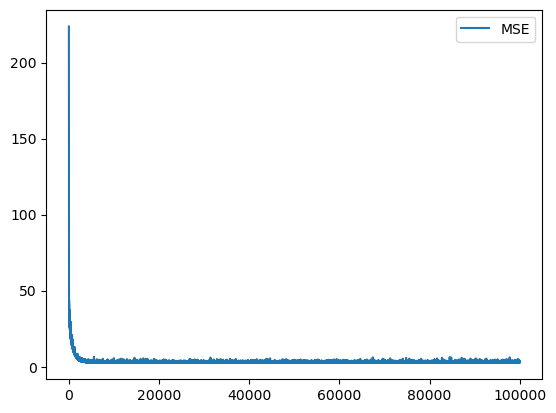

In [155]:
error_list_df.plot( y='MSE')
#df.plot(x='name', y='score', kind='line')

**Выведите вектор весов, к которому сошелся метод.**

In [153]:
# ваш код
stochastic_gradient_descent(X,y,w,eta=0.8,max_iter=100000,epsilon=1e-22)[0]

array([[18.43919224],
       [ 3.85781115],
       [ 2.66836508],
       [ 0.04579522]])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [158]:
# ваш код
error_list[-1]

2.7909751953517867